In [ ]:
import cv2
import numpy as np
import random as rn
from matplotlib import pyplot
from IPython.display import Image
from IPython import display

In [ ]:
print("Вывод случайного числа при помощи использования random.random()")


In [ ]:
#добавление фильтра сепия к картинке
img4 = cv2.imread('road1.jpg')
sepia = np.float32([
    [0.272,0.534,0.131],
    [0.349,0.686,0.168],
    [0.349,0.769,0.189]])

img4=cv2.transform(img4,sepia)
cv2.imwrite('road11.jpg',img4)
Image('road11.jpg')

In [182]:
net = cv2.dnn.readNet('yolov3.weights','yolov3.cfg')

In [183]:
#чтение файла с типами определяемых объектов
with open('coco.names.txt') as f:
    labels = f.read().strip().split('\n')
    

In [184]:
len(labels)

80

In [185]:
#объекты
labels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [186]:

img = cv2.imread('road1.jpg')
height, width, _  = img.shape
blob = cv2.dnn.blobFromImage(img, 1/255, (608,608),(0,0,0),swapRB=True)

In [187]:
blob

array([[[[0.20392159, 0.20784315, 0.20784315, ..., 0.21960786,
          0.21568629, 0.21960786],
         [0.20392159, 0.20784315, 0.20784315, ..., 0.21176472,
          0.21176472, 0.22352943],
         [0.20784315, 0.20784315, 0.20784315, ..., 0.21960786,
          0.21960786, 0.227451  ],
         ...,
         [0.07450981, 0.07450981, 0.07450981, ..., 0.06666667,
          0.06666667, 0.06666667],
         [0.07450981, 0.07450981, 0.07450981, ..., 0.06666667,
          0.06666667, 0.06666667],
         [0.07058824, 0.07058824, 0.07058824, ..., 0.06666667,
          0.0627451 , 0.0627451 ]],

        [[0.27058825, 0.27058825, 0.27058825, ..., 0.26666668,
          0.2627451 , 0.25882354],
         [0.26666668, 0.27058825, 0.27058825, ..., 0.25882354,
          0.25882354, 0.2627451 ],
         [0.27058825, 0.27058825, 0.27058825, ..., 0.26666668,
          0.26666668, 0.26666668],
         ...,
         [0.07450981, 0.07450981, 0.07450981, ..., 0.06666667,
          0.06666667, 0.0

In [188]:
blob.shape

(1, 3, 608, 608)

In [189]:
net.setInput(blob)

In [190]:
#создание слоев из исходного изображения
layer_names = net.getLayerNames()
out_layer_indexes_arr = net.getUnconnectedOutLayers()
#len(layer_names)
out_layer_indexes = [index[0]-1 for index in out_layer_indexes_arr]
out_layer_indexes


[199, 226, 253]

In [191]:
# вывод всех слоев
LayerNames = net.getLayerNames()
LayerNames

['conv_0',
 'bn_0',
 'relu_1',
 'conv_1',
 'bn_1',
 'relu_2',
 'conv_2',
 'bn_2',
 'relu_3',
 'conv_3',
 'bn_3',
 'relu_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'relu_6',
 'conv_6',
 'bn_6',
 'relu_7',
 'conv_7',
 'bn_7',
 'relu_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'relu_10',
 'conv_10',
 'bn_10',
 'relu_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'relu_13',
 'conv_13',
 'bn_13',
 'relu_14',
 'conv_14',
 'bn_14',
 'relu_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'relu_17',
 'conv_17',
 'bn_17',
 'relu_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'relu_20',
 'conv_20',
 'bn_20',
 'relu_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'relu_23',
 'conv_23',
 'bn_23',
 'relu_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'relu_26',
 'conv_26',
 'bn_26',
 'relu_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'relu_29',
 'conv_29',
 'bn_29',
 'relu_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'relu_32',
 'conv_32',
 'bn_32',
 'relu_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'relu_35',
 'conv_35',
 'b

In [192]:
# вывод только слоев "yolo"
out_layer_names = [layer_names[index] for index in out_layer_indexes]
out_layer_names

['yolo_82', 'yolo_94', 'yolo_106']

In [193]:
out_layers = net.forward(out_layer_names)
out_layers

[array([[0.03045397, 0.01792848, 0.17685378, ..., 0.        , 0.        ,
         0.        ],
        [0.03383261, 0.02237256, 0.15963952, ..., 0.        , 0.        ,
         0.        ],
        [0.03440104, 0.0152453 , 0.7300006 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9735423 , 0.9655571 , 0.2999767 , ..., 0.        , 0.        ,
         0.        ],
        [0.97527874, 0.97576433, 0.23660862, ..., 0.        , 0.        ,
         0.        ],
        [0.97644657, 0.97362006, 0.60976815, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02017828, 0.02244317, 0.04283127, ..., 0.        , 0.        ,
         0.        ],
        [0.01513038, 0.02181958, 0.10284325, ..., 0.        , 0.        ,
         0.        ],
        [0.01890626, 0.01361248, 0.0629812 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.982415  , 0.98624724, 0.0301503 , ..., 0.        , 0.        ,
         0.        

In [194]:
#cоздание функции для рисования квадратов вокруг объектов

def draw_object(img,x,y,w,h,label):
    x1, y1 = x-w//2, y-h//2 #точка отсчета - (X - пополам от центра, Y пополам от центра)
    x2, y2 = x+w//2, y+h//2 #точка отсчета - (X - пополам от центра, Y пополам от центра)
    color = [0,255,0]
    width = 1

    img = cv2.rectangle(img, (x1,y1),(x2,y2), color, width)

    font_size = 1
    font = cv2.FONT_HERSHEY_SIMPLEX  #стандартный шрифт
    text =  label
    'car'  #пишем имя car
    width=2
    img = cv2.putText(img,text,(x1,y1-5),font, font_size,color, width)
    
    return img

In [195]:
out_layers[0].shape



(1083, 85)

In [196]:
out_layers[1].shape

(4332, 85)

In [197]:
out_layers[2].shape

(17328, 85)

In [198]:
#вывод самых вероятных квадратов вокруг выбранных объектов

obj_boxes=[]
obj_probas=[]
obj_labels = []

for layer in out_layers :
   # print(layer.shape)
    for result in layer:
        x,y,w,h = result[:4]
        x=int(x*width)
        w=int(w*width)
        y=int(y*height)
        h=int(h*height)
        probas = result[5:]
        max_proba_index = np.argmax(probas)
        max_proba = probas[max_proba_index]
        if max_proba>0:
            obj_boxes.append([x,y,w,h])
            obj_probas.append(float(max_proba))
            obj_labels.append(labels[max_proba_index])
            
            #img5= draw_object(img,x,y,w,h)
            #print( x,y,w,h, labels[max_proba_index], probas)
            #print(result.shape)
            #print(x,y,w,h,probas)
            #print(x,y,w,h,len(probas))

In [199]:


fitred_boxes_index = cv2.dnn.NMSBoxes(obj_boxes, obj_probas, 0.0, 0.2)
fitred_boxes_index

array([[12],
       [66],
       [17],
       [64],
       [59],
       [15],
       [63],
       [11],
       [69],
       [75],
       [71],
       [41],
       [ 5],
       [55],
       [46],
       [44],
       [ 9],
       [31],
       [43],
       [35],
       [ 2],
       [49],
       [52],
       [47],
       [38],
       [34],
       [36],
       [32],
       [26],
       [21],
       [24],
       [23],
       [30],
       [22],
       [29],
       [20],
       [19]], dtype=int32)

In [200]:
#

for index_arr in fitred_boxes_index:
    index = index_arr[0]
    box = obj_boxes[index]
    x,y,w,h = box
    img6 = draw_object(img,x,y,w,h,obj_labels[index])

In [201]:
cv2.imwrite('road1001.jpg',img6)

True

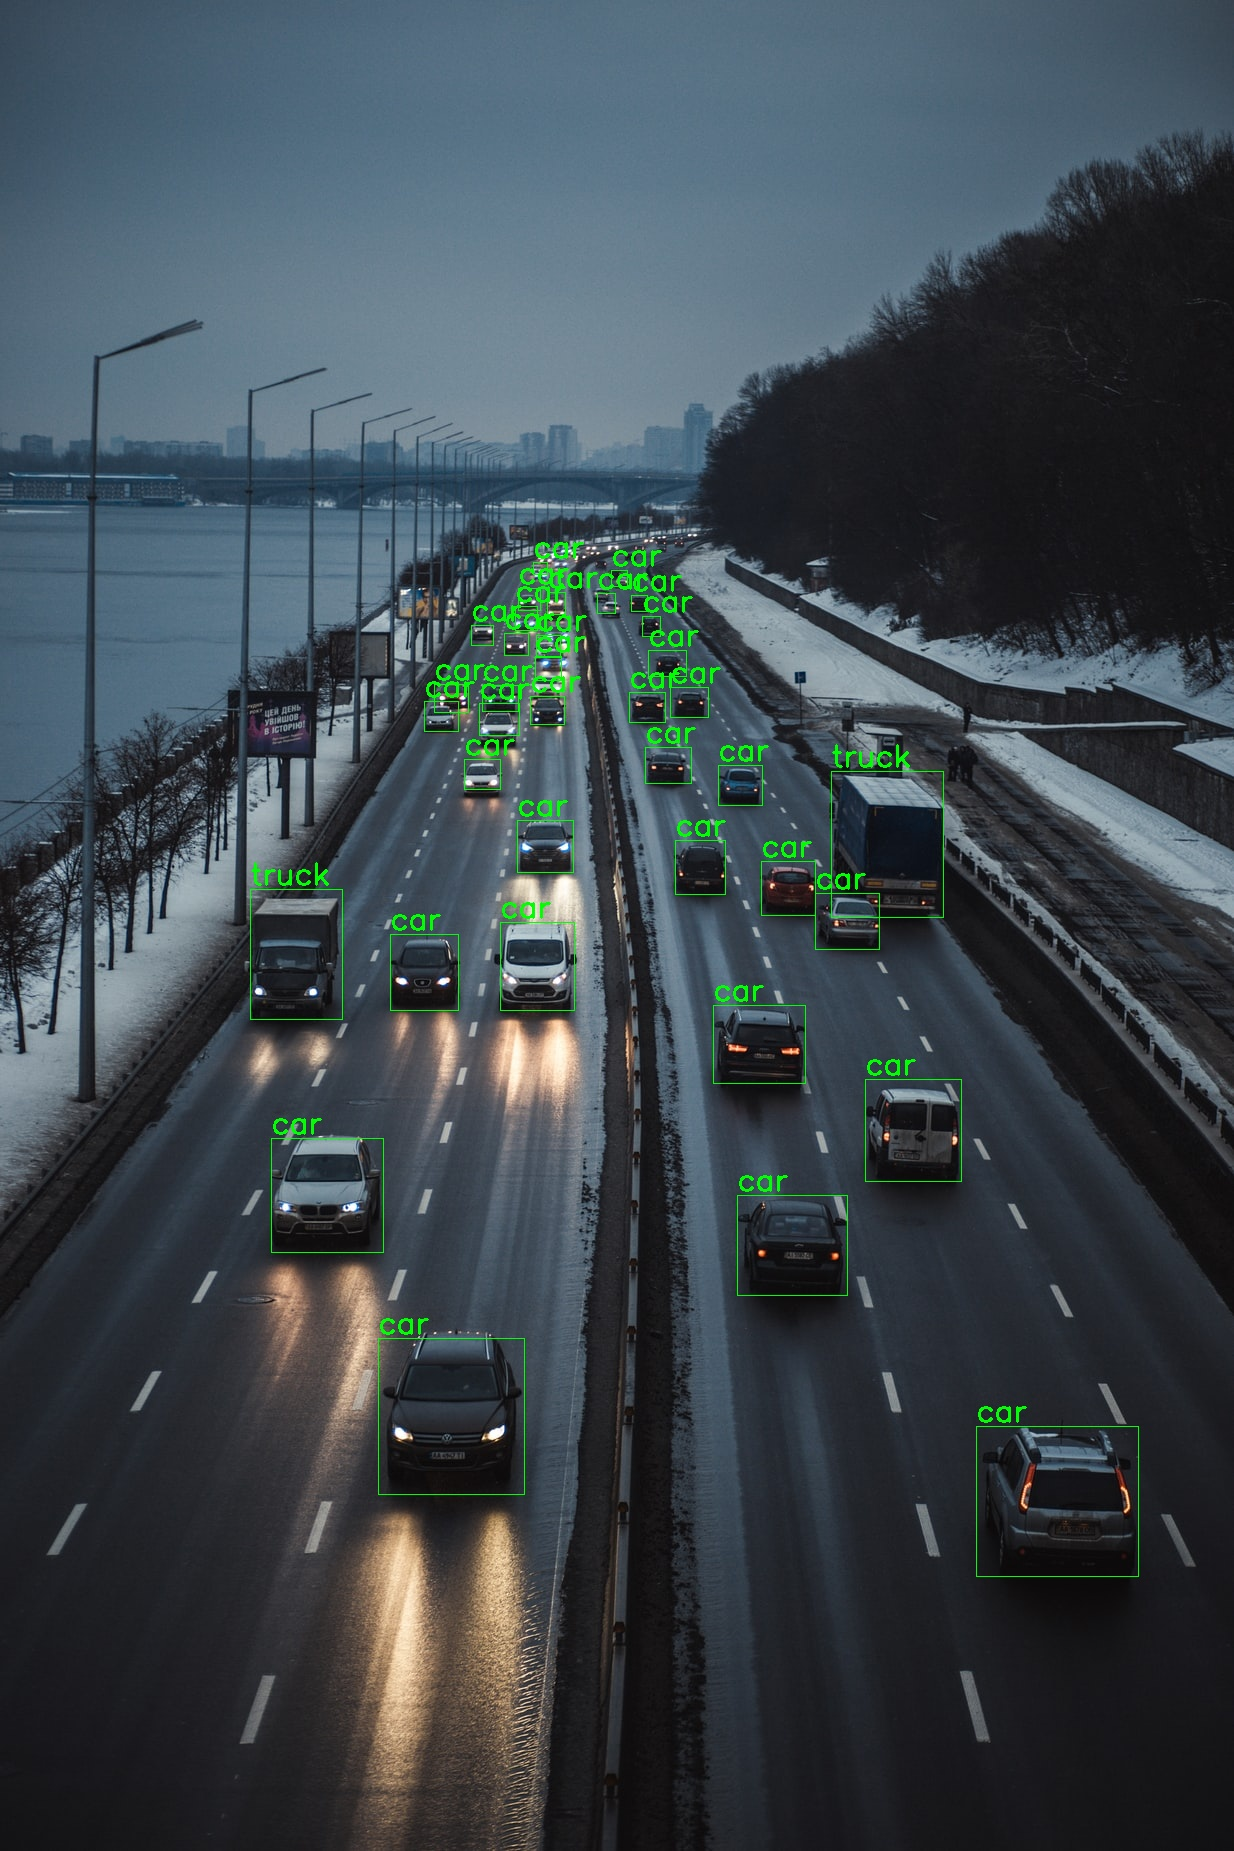

In [202]:
Image('road1001.jpg')

In [218]:
with open('coco.names.txt') as f:
    labels = f.read().strip().split('\n')
    
layer_names = net.getLayerNames()
    
out_layer_indexes_arr = net.getUnconnectedOutLayers()
out_layer_indexes = [index[0]-1 for index in out_layer_indexes_arr]

out_layer_names = [layer_names[index] for index in out_layer_indexes]
out_layer_names

['yolo_82', 'yolo_94', 'yolo_106']

In [221]:
def draw_object(img,x,y,w,h,label):
    x1, y1 = x-w//2, y-h//2 #точка отсчета - (X - пополам от центра, Y пополам от центра)
    x2, y2 = x+w//2, y+h//2 #точка отсчета - (X - пополам от центра, Y пополам от центра)
    color = [0,255,0]
    width = 3

    img = cv2.rectangle(img, (x1,y1),(x2,y2), color, width)

    font_size = 2
    font = cv2.FONT_HERSHEY_SIMPLEX  #стандартный шрифт
    text =  label
   
    #пишем имя car
    width=4
    img = cv2.putText(img,text,(x1,y1-5),font, font_size,color, width)
    
    return img


def apply_yolo(img):
    height, width, _  = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255, (608,608),(0,0,0),swapRB=True)
    net.setInput(blob)
    
    out_layers = net.forward(out_layer_names)
    #вывод самых вероятных квадратов вокруг выбранных объектов

    obj_boxes=[]
    obj_probas=[]
    obj_labels = []

    for layer in out_layers :
       # print(layer.shape)
        for result in layer:
            x,y,w,h = result[:4]
            x=int(x*width)
            w=int(w*width)
            y=int(y*height)
            h=int(h*height)
            probas = result[5:]
            max_proba_index = np.argmax(probas)
            max_proba = probas[max_proba_index]
            if max_proba>0:
                obj_boxes.append([x,y,w,h])
                obj_probas.append(float(max_proba))
                obj_labels.append(labels[max_proba_index])
                
    fitred_boxes_index = cv2.dnn.NMSBoxes(obj_boxes, obj_probas, 0.0, 0.2)
    
    for index_arr in fitred_boxes_index:
        index = index_arr[0]
        box = obj_boxes[index]
        x,y,w,h = box
        img = draw_object(img,x,y,w,h,obj_labels[index])
        
    return img 

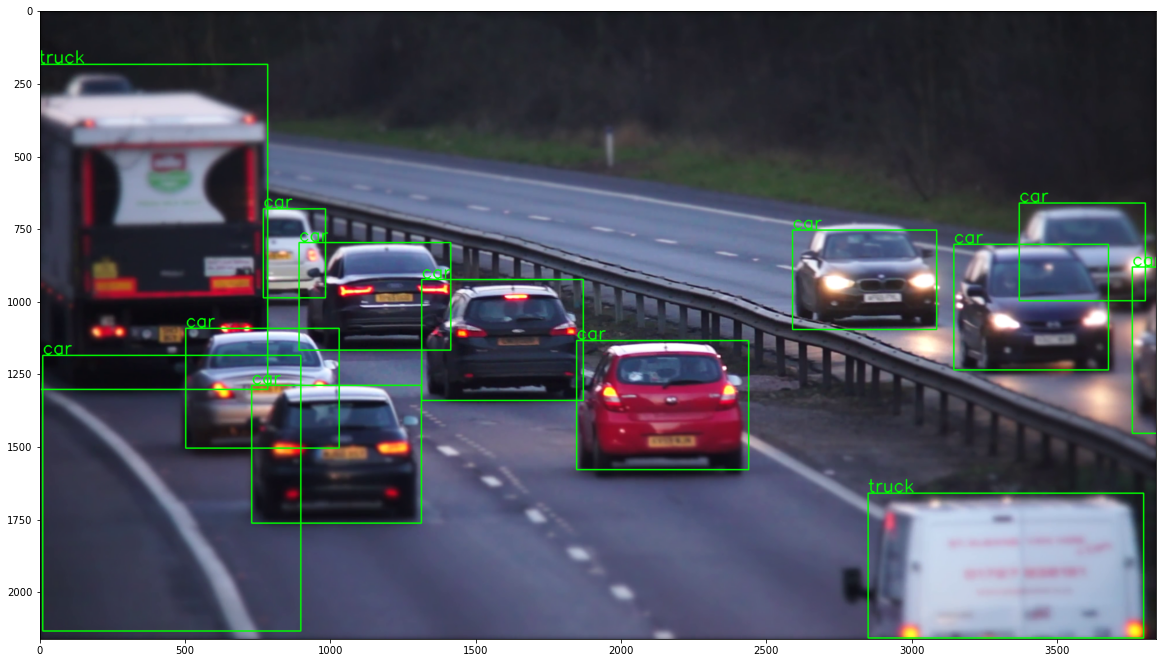

.

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001AC1E2041F0> (for post_execute):


KeyboardInterrupt: 

In [228]:
cap= cv2.VideoCapture('Pexel.mp4')

while cap.isOpened():
    
        print('.',end='')
        
        ret,frame = cap.read()
        if not ret:
            break
        
        #   apply_yolo :
        #на вход функции подается картинка , ф-ия создает блок из картинок,
        #подает на вход нейросети,        
        #обсчитывает, рисует картинки, подает на выход фрейм с отрисованными картинками
        frame=apply_yolo(frame)
                
        #RGB цвета! а не инвертированниые
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        pyplot.figure(figsize=(20,15))
        pyplot.imshow(frame)
        display.clear_output(wait=True)
        display.display(pyplot.gcf())
        
cap.release()


In [223]:
size = (3840,2160)

codec = cv2.VideoWriter_fourcc(*'MJPG')
writer = cv2.VideoWriter('out_day2.avi',codec,5,size)

cap= cv2.VideoCapture('Pexel.mp4')

#обработка только первые 20 фреймов
for i in range(20):
#while cap.isOpened():
        print('.',end='')
        
        ret,frame = cap.read()
        if not ret:
            break
         
        frame = apply_yolo(frame)
        frame = cv2.resize(frame,size)     
        writer.write(frame)
        
cap.release()
writer.release()

....................

In [232]:

f=random.randint(1,7)
f

2